In [4]:
using CSV
using DataFrames

matrices = CSV.read("matrices.csv", DataFrame)
matrices=convert(Matrix,matrices)

25×4 Array{Float64,2}:
 1.0         0.0           0.0          1.0      
 0.937846    0.0202592     0.0202592    0.915538 
 0.892274   -0.0057473    -0.0057473    0.868228 
 0.816676    0.0164362     0.0164362    0.813774 
 0.754234   -0.00301909   -0.00301909   0.775866 
 0.717699   -0.0083678    -0.0083678    0.702784 
 0.650663    0.0173482     0.0173482    0.640937 
 0.598021   -0.000483399  -0.000483399  0.600625 
 0.555279   -0.00289314   -0.00289314   0.551152 
 0.509811   -0.0155931    -0.0155931    0.514116 
 0.464501   -0.00780845   -0.00780845   0.467531 
 0.415348   -0.00941381   -0.00941381   0.419551 
 0.374323   -0.00335939   -0.00335939   0.370997 
 0.327169   -0.00528682   -0.00528682   0.333736 
 0.293427   -0.00205503   -0.00205503   0.293737 
 0.255879    0.003712      0.003712     0.25913  
 0.220465    0.00412982    0.00412982   0.223545 
 0.184059    0.000236846   0.000236846  0.192436 
 0.157865   -0.00322539   -0.00322539   0.158883 
 0.120256    0.00110626    

In [5]:
using Interpolations
itp11 = interpolate(matrices[:,1], BSpline(Cubic(Line(OnGrid()))))
itp12 = interpolate(matrices[:,2], BSpline(Cubic(Line(OnGrid()))))
itp21 = interpolate(matrices[:,3], BSpline(Cubic(Line(OnGrid()))))
itp22 = interpolate(matrices[:,4], BSpline(Cubic(Line(OnGrid()))))
Ds(rho) = [[itp11(1+24*rho),itp12(1+24*rho)],[itp21(1+24*rho),itp22(1+24*rho)]]

Ds (generic function with 1 method)

In [6]:
rho = 0.5

Ds(rho)

2-element Array{Array{Float64,1},1}:
 [0.374323, -0.00335939]
 [-0.00335939, 0.370997]

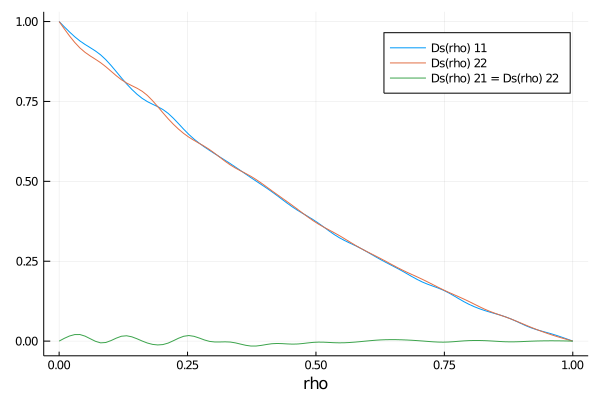

In [11]:
using Plots
v = zeros(100)
w = zeros(100)
x = zeros(100)
for i = 1:100
    j = 1 + (i-1)/99*24
    v[i] = itp11(j)
    w[i] = itp22(j)
    x[i] = itp12(j)
end
plot(0:1/99:1,v,label = "Ds(rho) 11")
plot!(0:1/99:1,w,label = "Ds(rho) 22")
plot!(0:1/99:1,x,label = "Ds(rho) 21 = Ds(rho) 22")
xlabel!("rho")